In [45]:
import numpy
import pandas
import matplotlib.pyplot as plt
import scipy
# https://www.freecodecamp.org/news/how-machines-make-predictions-finding-correlations-in-complex-data-dfd9f0d87889/

7.1 Tehtävässä 5.1 huomattiin ihmisen iän ja pituuden välillä selkeä lineaarinen riippuvuus. Määritä tälle lineaariselle riippuvuudelle Pearsonin korrelaatiokerroin. Mikä on korrelaation voimakkuus ja suunta? Mikä on selitysaste ja mitä se kertoo? Entä mikä on regressiosuoran kulmakerroin ja miten se sopii yhteen korrelaatiokertoimen kanssa?
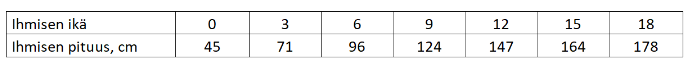

In [46]:
## Code here
humans_age_to_height = {0:45, 3:71, 6:96, 9:124, 12:147, 15:164, 18:178}

ages = list(humans_age_to_height.keys())
heights = list(humans_age_to_height.values())

correlation = numpy.corrcoef(ages, heights)[0,1]

print("Correlation coefficient:", correlation)
print("Voimakkuus: voimakas, suunta: positiivinen")

deg_of_explanation = correlation**2 * 100

print("Selitysaste:", deg_of_explanation, "%")
print("Selitysaste ilmaisee kuinkamonta prosenttia muuttujan arvoista selittää toisen muuttujan arvoja. Tässä tapauksessa 96% ihmisen iästä selittää hänen pituuttaan.")

coefficients = numpy.polyfit(ages, heights, 1)
print("Kulmakerroin:", coefficients[0], "selittää että korrelaatio on isompi kuin 0 ja on positiivinen")



Correlation coefficient: 0.9942161480985
Voimakkuus: voimakas, suunta: positiivinen
Selitysaste: 98.84657491398185 %
Selitysaste ilmaisee kuinkamonta prosenttia muuttujan arvoista selittää toisen muuttujan arvoja. Tässä tapauksessa 96% ihmisen iästä selittää hänen pituuttaan.
Kulmakerroin: 7.571428571428569 selittää että korrelaatio on isompi kuin 0 ja on positiivinen


7.2 Tehtävässä 5.3 oli miesten 100 metrin maailmanennätykset niiden vuosiluvun mukaan. Mikä on tämän aineiston Pearsonin korrelaatiokerroin? Mikä on korrelaation voimakkuus ja suunta? Mikä on selitysaste ja mitä se kertoo? Entä mikä on regressiosuoran kulmakerroin ja miten se sopii yhteen korrelaatiokertoimen kanssa?
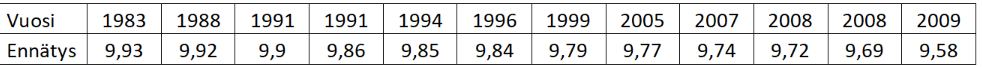

In [47]:
## Code here
year_to_record100m = {1983:9.93, 1988:9.92, 1991:9.9, 1992:9.86, 1994:9.85, 1996:9.84, 1999:9.79, 2005:9.77, 2007:9.74, 2008:9.69 ,2009:9.58}

years = list(year_to_record100m.keys())
records = list(year_to_record100m.values())

correlation = numpy.corrcoef(years, records)[0,1]

print("Correlation coefficient:", correlation)
print("Voimakkuus: voimakas, suunta: negatiivinen")

deg_of_explanation = correlation**2 * 100

print("Selitysaste:", deg_of_explanation, "%")
print("Selitysaste kertoo että 86% vuosista selittää 100m ennätystä.")

coefficients = numpy.polyfit(years, records, 1)
print("Kulmakerroin:", coefficients[0], "selittää että korrelaatio on isompi kuin 0 ja on negatiivinen")


Correlation coefficient: -0.9281508930626704
Voimakkuus: voimakas, suunta: negatiivinen
Selitysaste: 86.14640802930327 %
Selitysaste kertoo että 86% vuosista selittää 100m ennätystä.
Kulmakerroin: -0.011212934858744677 selittää että korrelaatio on isompi kuin 0 ja on negatiivinen


7.3 Edellisessä tehtävässä havaintopiste (2009;9,58), eli Usain Boltin 2009 maailmanennätys, oli poikkeava havaintoarvo. Jos poistamme sen aineistosta, mitkä ovat korrelaatiokerroin ja selitysaste? Kuinka monta prosenttiyksikköä selitysaste parani

In [48]:
## Code here
years.remove(2009)
records.remove(9.58)

correlation_without_outlier = numpy.corrcoef(years, records)[0,1]

print("Correlation coefficient:", correlation_without_outlier)

deg_of_explanation_without_outlier = correlation_without_outlier**2 * 100

print("Selitysaste:", deg_of_explanation_without_outlier, "%")

difference = deg_of_explanation - deg_of_explanation_without_outlier

print("Ero:", difference, "%")

Correlation coefficient: -0.9732914712031866
Selitysaste: 94.72962879168634 %
Ero: -8.583220762383064 %


7.4 Tehtävässä 6.1 huomattiin ihmisen iän ja Cooperin testin välillä toisen asteen polynomiaalinen riippuvuus. Laske tämän riippuvuuden selitysaste sekä poikkeavan havaintoarvon (65, 2650) kanssa että ilman. Laske myös lineaarisen riippuvuuden selitysaste ilman poikkeavaa havaintoarvoa. Mitä huomaat selitysasteista?
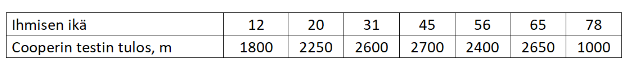

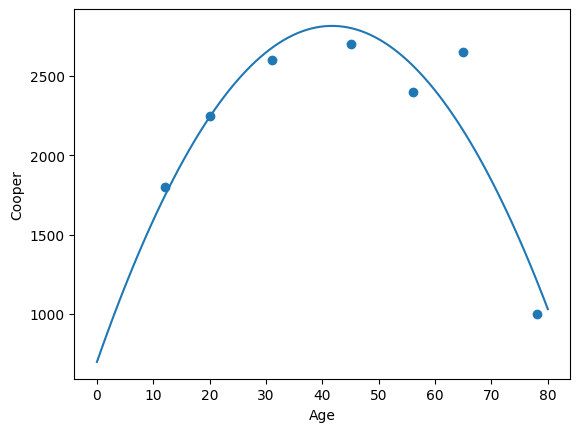

In [49]:
## Code here
humans_age_to_cooper = {12:1800, 20:2250, 31:2600, 45:2700, 56:2400, 65:2650, 78:1000}

ages = list(humans_age_to_cooper.keys())
coopers = list(humans_age_to_cooper.values())

plt.scatter(ages, coopers)
plt.xlabel("Age")
plt.ylabel("Cooper")

model = numpy.poly1d(numpy.polyfit(ages, coopers, 2))
line = numpy.linspace(0, 80, 100)
plt.plot(line, model(line))

plt.show()

In [50]:
## https://www.statology.org/polynomial-regression-python/
print(model)

def polyfit(x, y, degree):
    results = {}
    coeffs = numpy.polyfit(x, y, degree)
    p = numpy.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = numpy.sum(y)/len(y)
    ssreg = numpy.sum((yhat-ybar)**2)
    sstot = numpy.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

deg_of_explanation_with_outlier_parabola = polyfit(ages, coopers, 2)

print("Selitysaste poikkeavalla:", deg_of_explanation_with_outlier_parabola["r_squared"]*100, "%")

## Now lets remove the outlier

ages.remove(65)
coopers.remove(2650)

deg_of_explanation_without_outlier_parabola = polyfit(ages, coopers, 2)

print("Selitysaste ilman poikkeavaa:", deg_of_explanation_without_outlier_parabola["r_squared"]*100, "%")

## Let's compare it to linear regression

deg_of_explanation_without_outlier_linear = numpy.corrcoef(ages, coopers)[0,1]**2 * 100

print("Selitysaste lineaarisesti:", deg_of_explanation_without_outlier_linear, "%")

print("Tästä voimme huomata että correlaatio pitää huomioida suhteessa mihin malliin sitä käytetään. Lineaarinen malli ei ole hyvä tässä tapauksessa koska se ei huomioi poikkeavaa arvoa. Parabolinen malli on parempi koska se huomioi poikkeavan arvon ja selittää paremmin muuttujien välistä suhdetta.")

        2
-1.218 x + 101.6 x + 697.2
Selitysaste poikkeavalla: 85.0310737864042 %
Selitysaste ilman poikkeavaa: 99.96129543646082 %
Selitysaste lineaarisesti: 18.210009859617827 %
Tästä voimme huomata että correlaatio pitää huomioida suhteessa mihin malliin sitä käytetään. Lineaarinen malli ei ole hyvä tässä tapauksessa koska se ei huomioi poikkeavaa arvoa. Parabolinen malli on parempi koska se huomioi poikkeavan arvon ja selittää paremmin muuttujien välistä suhdetta.


7.5 Alla olevassa taulukossa on opiskelijoiden opintopistekertymät neljänä ensimmäisenä vuonna. Laske tälle aineistolle Spearmanin järjestyskorrelaatiokerroin. Mikä on sen voimakkuus ja suunta? Mikä on selitysaste? Mitä selitysaste tarkoittaa tässä yhteydessä?
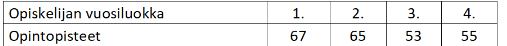

In [51]:
## Code here
year_class = [1, 2, 3, 4]
study_points = [67, 65, 53, 55]
df = pandas.DataFrame({"Year class": year_class, "Study points": study_points})

rho, p = scipy.stats.spearmanr(year_class, study_points)
print("Spearman's rho:", rho)
print("p-value:", p)

print("Korrelaatio on negatiivinen ja voimakas, mutta ei täysin lineaarinen.")

deg_of_explanation_rho = rho**2 * 100

print("Selitysaste:", deg_of_explanation_rho, "%")
print("selitys aste selittää että opintovuosi selittää 64% opintopisteitä.")

Spearman's rho: -0.7999999999999999
p-value: 0.20000000000000007
Korrelaatio on negatiivinen ja voimakas, mutta ei täysin lineaarinen.
Selitysaste: 63.99999999999999 %
selitys aste selittää että opintovuosi selittää 64% opintopisteitä.


7.6 Laske edellisen tehtävän aineistolle Kendallin järjestyskorrelaatiokerroin. Mikä on sen voimakkuus ja suunta? Mikä on selitysaste ja kuinka monta prosenttiyksikköä se poikkeaa Spearmanin selitysasteesta

In [52]:
## Code here
## Lets use kendall's tau
tau, p = scipy.stats.kendalltau(year_class, study_points)

print("Kendall's tau:", tau)
print("Korrelaatio on negatiivinen ja huomattava")

deg_of_explanation_tau = tau**2 * 100

print("Selitysaste:", deg_of_explanation_tau, "%")
print("selitys aste selittää että opintovuosi selittää 44% opintopisteitä. se eroaa spearmanista 20% verran.")

Kendall's tau: -0.6666666666666669
Korrelaatio on negatiivinen ja huomattava
Selitysaste: 44.44444444444447 %
selitys aste selittää että opintovuosi selittää 44% opintopisteitä. se eroaa spearmanista 20% verran.
